In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('Test-Set.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Data Cleansing

## Column Weight

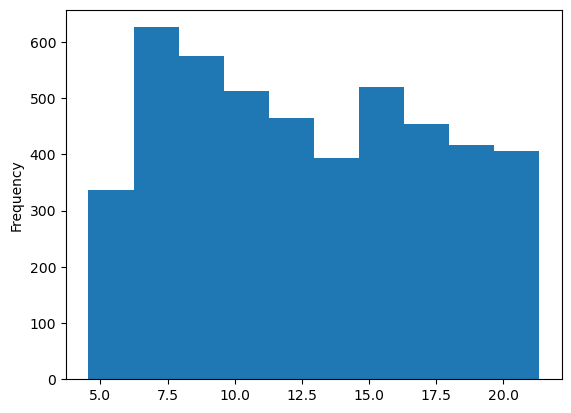

In [10]:
df['Weight'].plot(kind="hist");

In [11]:
val = df['Weight'].mean()
df['Weight'] = df['Weight'].fillna(val)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             5681 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


## Column OutletSize

In [13]:
df.OutletSize.value_counts()

OutletSize
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [14]:
val = df.OutletSize.mode().values[0]
df['OutletSize'] = df.OutletSize.fillna(val)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             5681 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         5681 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [16]:
df.OutletSize.value_counts()

OutletSize
Medium    3468
Small     1592
High       621
Name: count, dtype: int64

In [17]:
df.OutletSize.isna().sum()

0

## Duplicated

In [18]:
df.duplicated().sum()

0

# Data Manipulation

## Sorting

In [40]:
df.sort_values(by='ProductID', ascending=True)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8043,DRA12,11.600000,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308
118,DRA12,11.600000,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Medium,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.600000,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.600000,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Medium,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.600000,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.650000,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.650000,Low Fat,0.000000,Household,161.5552,OUT010,1998,Medium,Tier 3,Grocery Store,324.9104
1896,NCZ54,12.857645,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,12.857645,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


## Pivot

In [43]:
df.ProductType[df['FatContent']=='Low Fat'].value_counts()

ProductType
Household                840
Snack Foods              645
Fruits and Vegetables    580
Health and Hygiene       481
Frozen Foods             424
Dairy                    382
Soft Drinks              339
Canned                   314
Baking Goods             301
Hard Drinks              199
Meat                     159
Others                   156
Breads                   126
Starchy Foods             72
Breakfast                 39
Seafood                   32
Name: count, dtype: int64

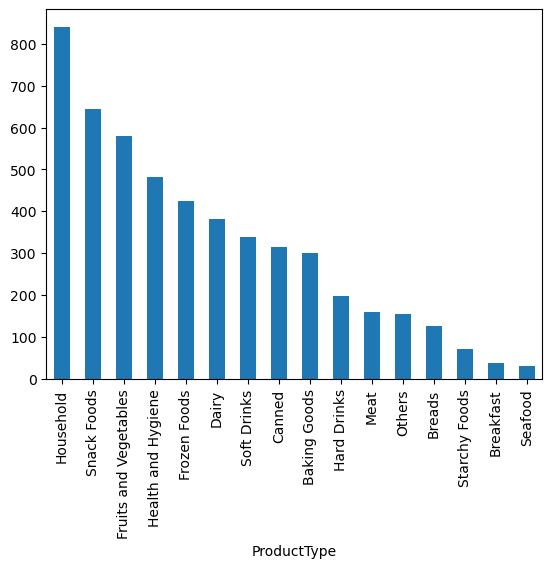

In [44]:
df.ProductType[df['FatContent']=='Low Fat'].value_counts().plot(kind='bar');

## Get Dummies

In [45]:
df_slice = df[['FatContent', 'ProductType']]
df_slice

,FatContent,ProductType
0,Low Fat,Dairy
1,Regular,Soft Drinks
2,Low Fat,Meat
3,Regular,Fruits and Vegetables
4,Low Fat,Household
...,...,...
8518,Low Fat,Snack Foods
8519,Regular,Baking Goods
8520,Low Fat,Health and Hygiene
8521,Regular,Snack Foods


In [47]:
pd.get_dummies(df_slice, 'FatContent')

,FatContent_LF,FatContent_Low Fat,FatContent_Regular,FatContent_low fat,FatContent_reg,FatContent_Baking Goods,FatContent_Breads,FatContent_Breakfast,FatContent_Canned,FatContent_Dairy,...,FatContent_Fruits and Vegetables,FatContent_Hard Drinks,FatContent_Health and Hygiene,FatContent_Household,FatContent_Meat,FatContent_Others,FatContent_Seafood,FatContent_Snack Foods,FatContent_Soft Drinks,FatContent_Starchy Foods
0,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8519,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8520,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8521,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Filtering

In [49]:
df[df['ProductType'] == 'Health and Hygiene']

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
16,NCB42,11.800000,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
31,NCS17,18.600000,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644
35,NCX29,10.000000,Low Fat,0.089291,Health and Hygiene,146.7102,OUT049,1999,Medium,Tier 1,Supermarket Type1,3791.0652
46,NCP05,19.600000,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,Medium,Tier 2,Supermarket Type1,2428.8384
50,NCL17,7.390000,Low Fat,0.067780,Health and Hygiene,143.8812,OUT046,1997,Small,Tier 1,Supermarket Type1,3134.5864
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,12.857645,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8475,NCS17,18.600000,Low Fat,0.080627,Health and Hygiene,92.5436,OUT049,1999,Medium,Tier 1,Supermarket Type1,378.1744
8476,NCO41,12.500000,Low Fat,0.018887,Health and Hygiene,98.8384,OUT045,2002,Medium,Tier 2,Supermarket Type1,1280.9992
8499,NCK53,11.600000,Low Fat,0.037574,Health and Hygiene,100.0042,OUT035,2004,Small,Tier 2,Supermarket Type1,2976.1260


## Grouping

In [51]:
df[['Weight', 'ProductType']].groupby('ProductType').mean()

,Weight
ProductType,
Baking Goods,12.377448
Breads,11.629818
Breakfast,12.785278
Canned,12.399254
Dairy,13.329387
Frozen Foods,12.865543
Fruits and Vegetables,13.161297
Hard Drinks,11.611435
Health and Hygiene,13.093044


## Joining/merging

In [52]:
df1 = df[['ProductID', 'FatContent', 'ProductType']][0:5]

In [55]:
df2 = df[['ProductID', 'Weight', 'ProductVisibility']][0:5]

In [56]:
df_merge = pd.merge(df1, df2, how='left', on=['ProductID'])
df_merge

,ProductID,Weight_x,ProductVisibility_x,Weight_y,ProductVisibility_y
0,FDA15,9.30,0.016047,9.30,0.016047
1,DRC01,5.92,0.019278,5.92,0.019278
2,FDN15,17.50,0.016760,17.50,0.016760
3,FDX07,19.20,0.000000,19.20,0.000000
4,NCD19,8.93,0.000000,8.93,0.000000


## Slicing

In [58]:
df_slice = df[['FatContent', 'ProductType']]
slice_pivot = df_slice.pivot_table(index=['FatContent'], columns=['ProductType'], \
                                    aggfunc=np.size,fill_value=0)

In [59]:
slice_pivot

ProductType,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
FatContent,,,,,,,,,,,,,,,,
LF,40,16,4,34,48,44,78,16,58,108,20,22,8,62,56,18
Low Fat,602,252,78,628,764,848,1160,398,962,1680,318,312,64,1290,678,144
Regular,612,216,134,594,516,774,1154,0,0,0,496,0,54,970,140,118
low fat,16,12,0,20,24,8,22,14,20,32,2,4,2,32,14,2
reg,26,6,4,22,12,38,50,0,0,0,14,0,0,46,2,14
